# Import các thư viện cần thiết

In [7]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Thiết lập kiểu mặc định cho các biểu đồ Seaborn

# Các thư viện bổ sung cho việc trực quan hóa và vẽ biểu đồ
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix

# Các thư viện cho các tác vụ học máy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Để loại bỏ các cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Vẽ biểu đồ trực tiếp trong Jupyter Notebook
%matplotlib inline

# Đọc dữ liệu từ file CSV

In [8]:
# Đọc file CSV
diabetes_df = pd.read_csv('..\Data\diabetes.csv')
# Hiển thị 5 dòng đầu tiên
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
#Tổng số cột trong tập dữ liệu
print("Tổng số cột trong tập dữ liệu: ", len(diabetes_df.columns))
# Hiển thị các cột trong tập dữ liệu theo dạng bảng
print("Các cột trong tập dữ liệu: ")
print(diabetes_df.columns.values)

Tổng số cột trong tập dữ liệu:  9
Các cột trong tập dữ liệu: 
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [10]:
# Hiển thị thông tin tổng quan của tập dữ liệu
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#Hiển thị thông tin mô tả của tập dữ liệu
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Làm sạch dữ liệu


In [12]:
# Kiểm tra xem có giá trị null nào không
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [13]:
# Kiểm tra xem có bao nhiêu giá trị null trong mỗi cột
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Sao chép DataFrame để không ảnh hưởng đến bản gốc
diabetes_df_copy = diabetes_df.copy(deep=True)


In [15]:
# Kiểm tra xem có bao nhiêu giá trị null trong mỗi cột
diabetes_df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Thay thế các giá trị 0 bằng NaN trong các cột đã chọn
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Hiển thị số lượng giá trị NaN trong mỗi cột
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


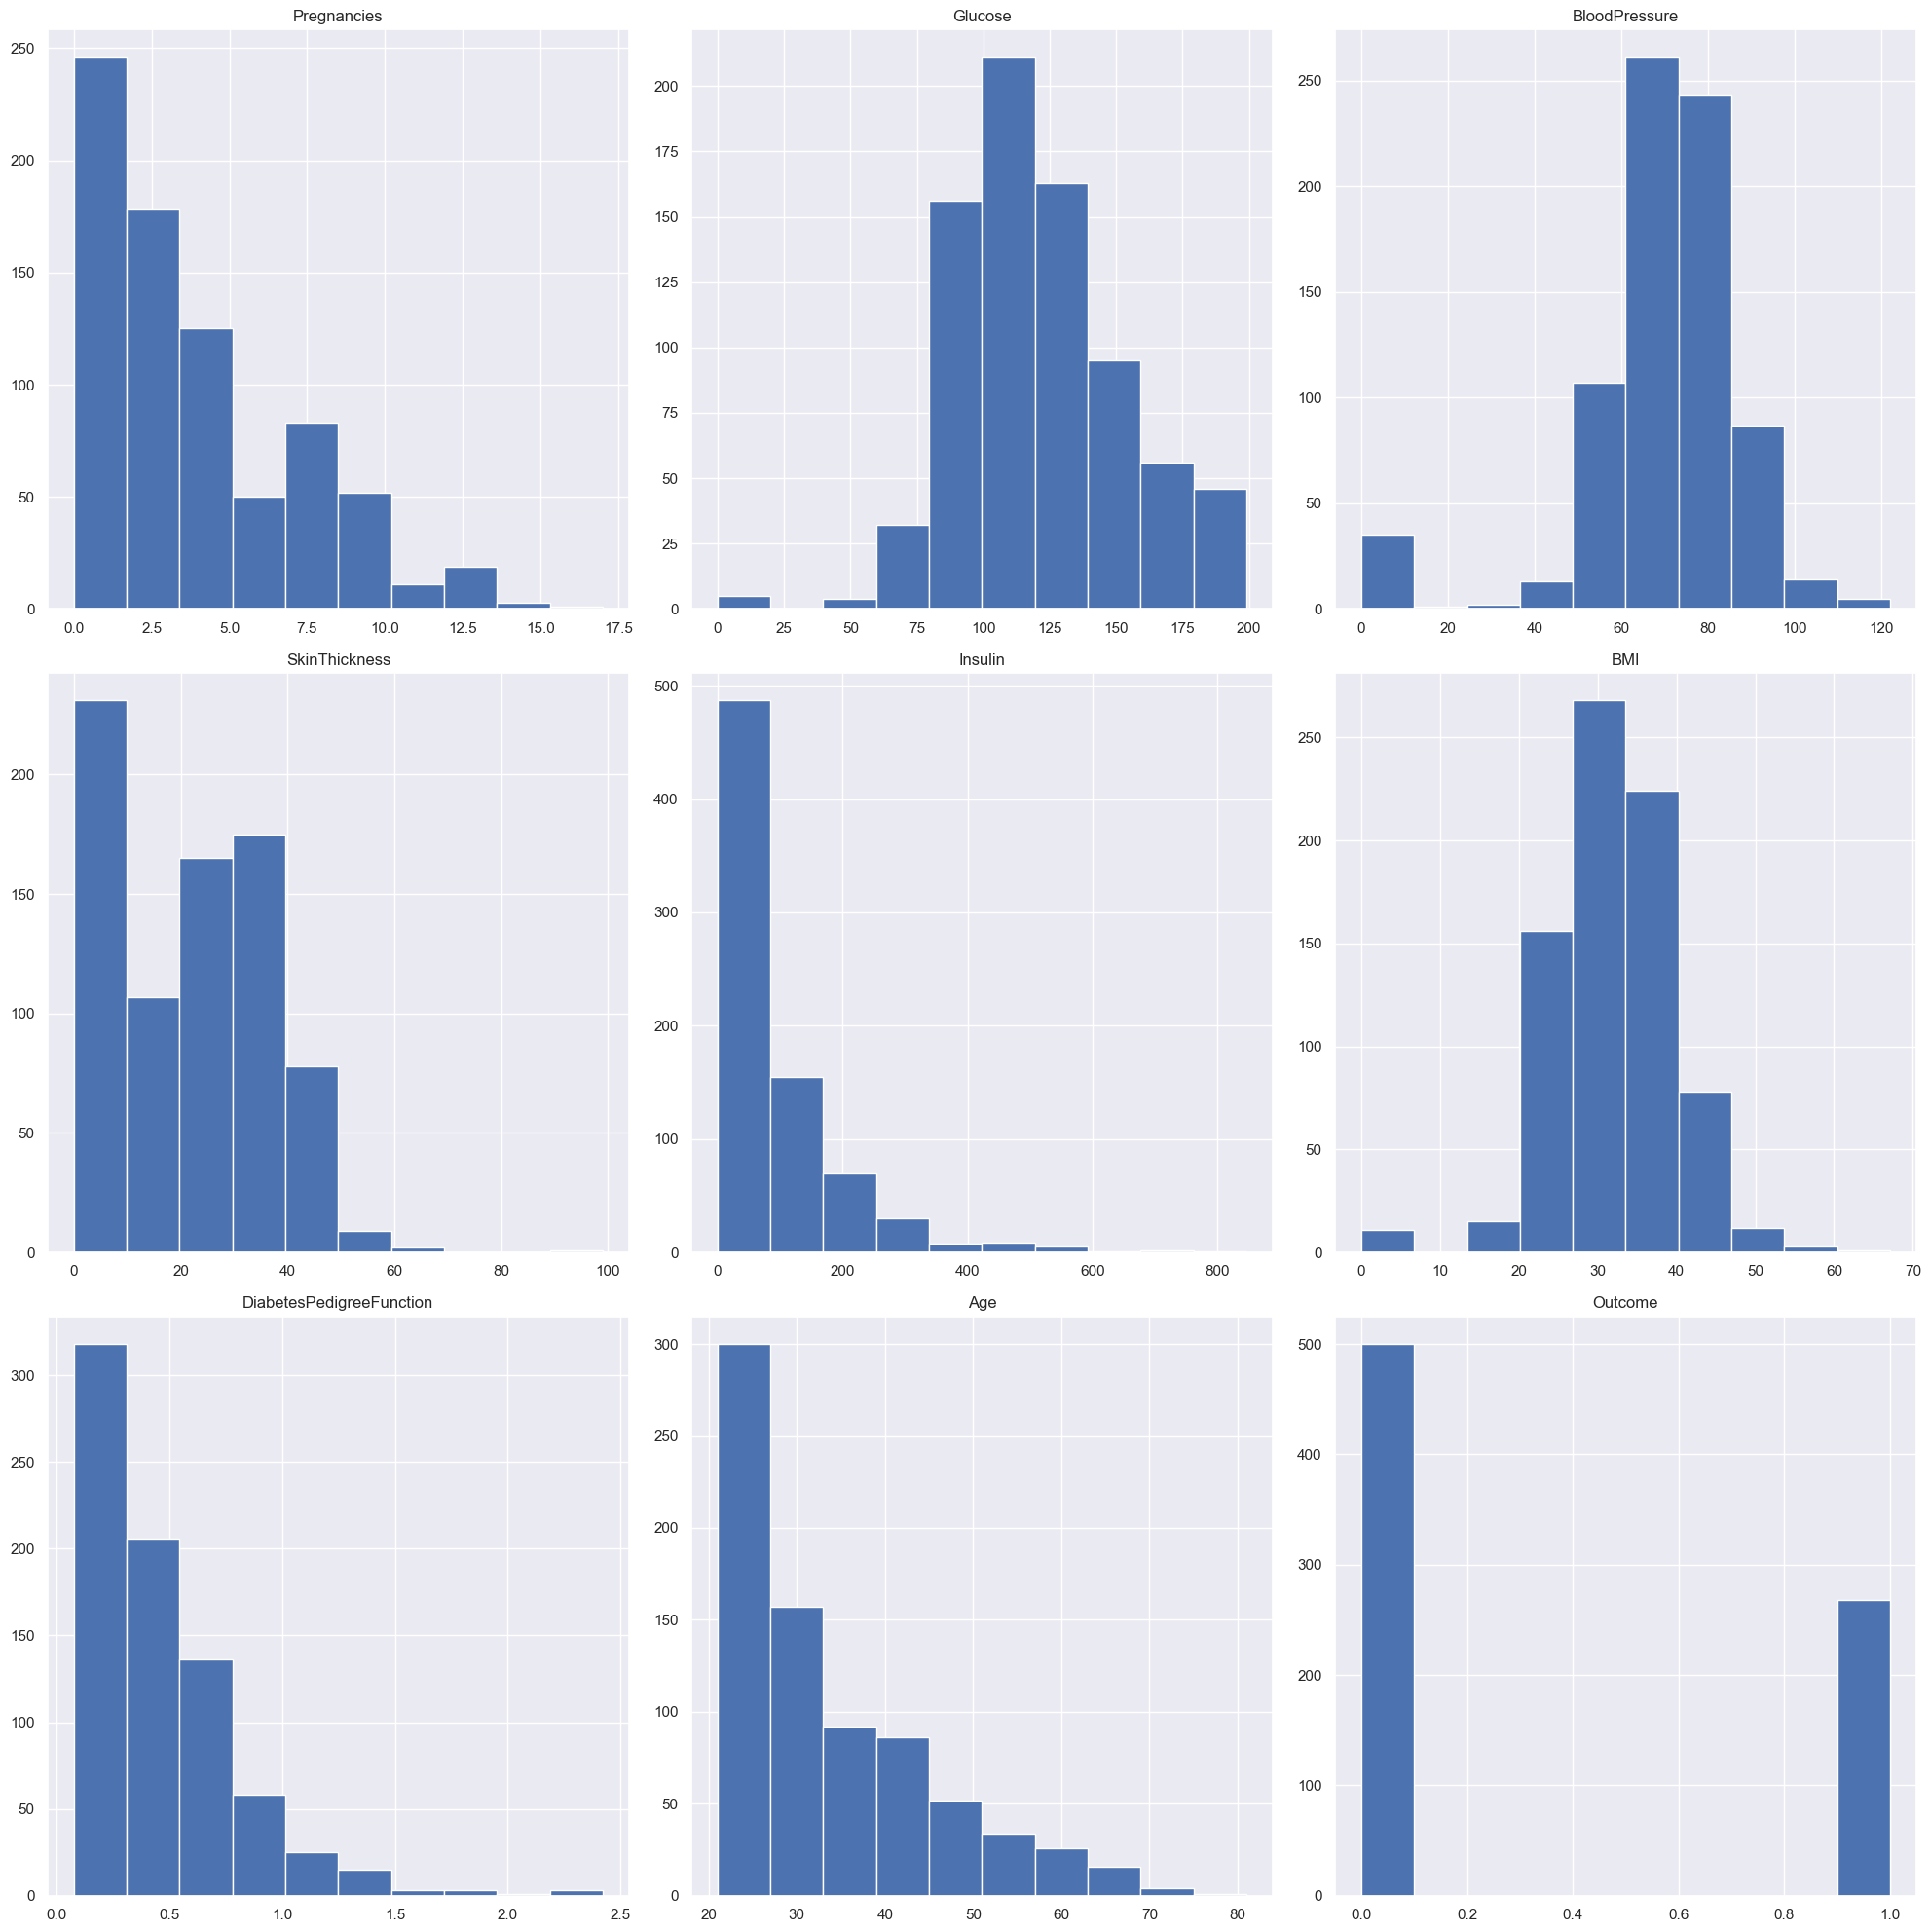

In [17]:
# Vẽ các biểu đồ phân phối dữ liệu
p = diabetes_df.hist(figsize=(20, 20))
# chia thành 6 biểu đồ
plt.tight_layout()
plt.show()

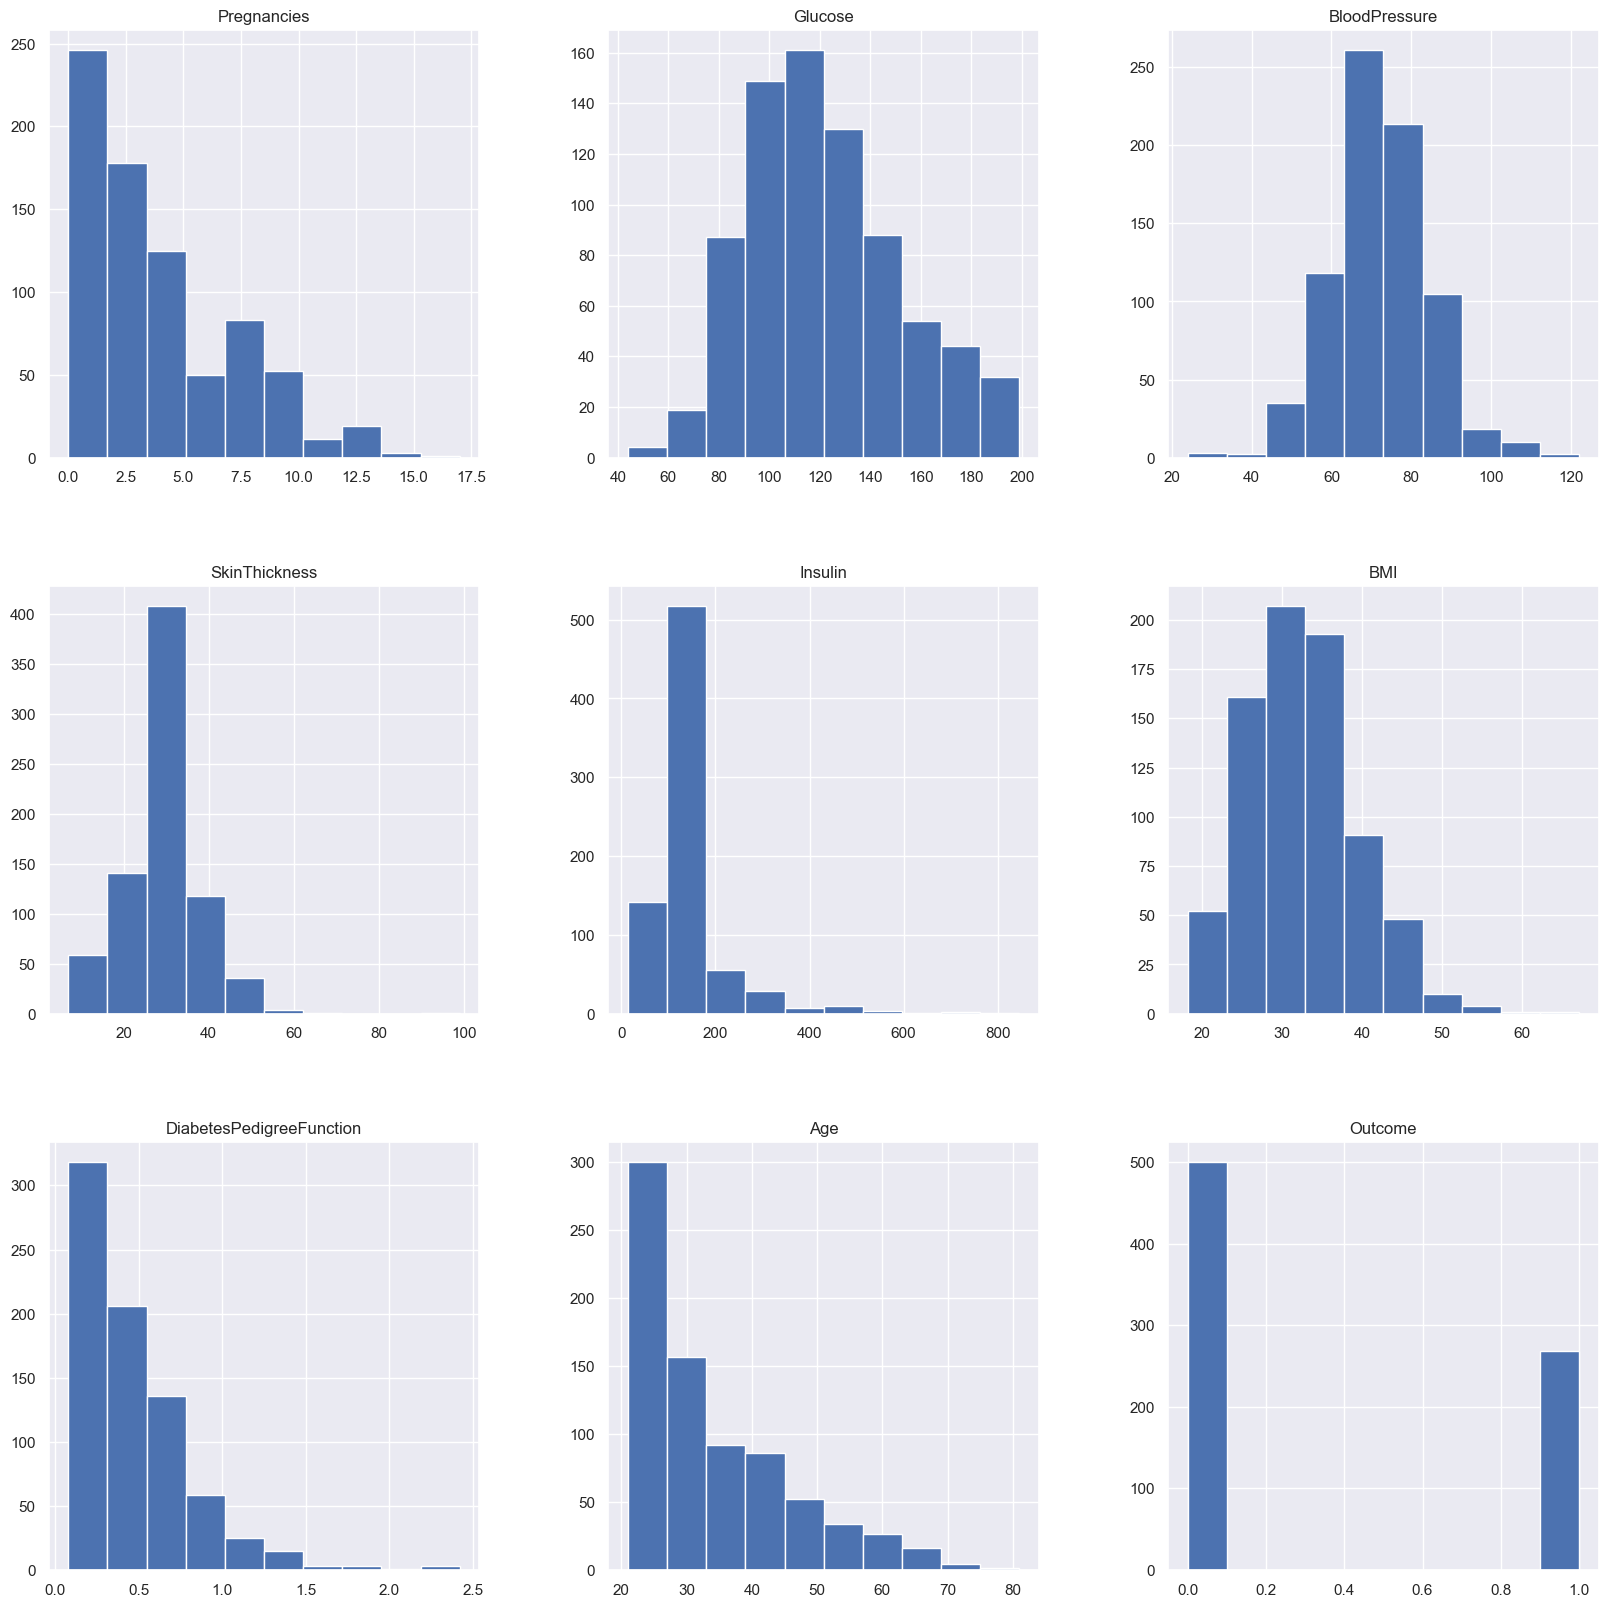

In [18]:
# Điền các giá trị NaN cho các cột tương ứng dựa trên phân phối của chúng
# Điền giá trị trung bình mean() hoặc giá trị trung vị median()
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

#  Vẽ biểu đồ phân phối sau khi loại bỏ các giá trị NaN
p = diabetes_df_copy.hist(figsize=(20, 20))

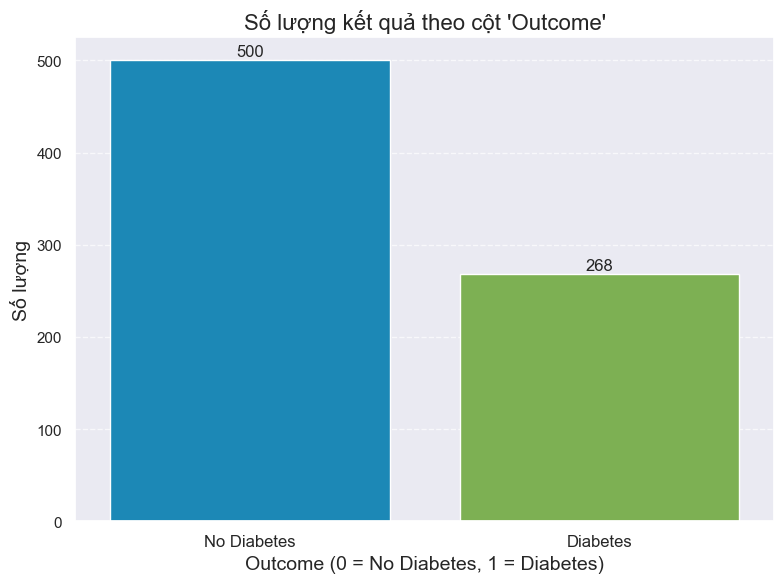

In [67]:
# Đếm số lượng từng giá trị trong cột Outcome
outcome_counts = diabetes_df["Outcome"].value_counts()

# Vẽ biểu đồ với Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    x=outcome_counts.index, 
    y=outcome_counts.values, 
    palette=["#0392cf", "#7bc043"]
)

# Thêm các giá trị trên đỉnh cột
for i, value in enumerate(outcome_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# Tùy chỉnh biểu đồ
plt.title("Số lượng kết quả theo cột 'Outcome'", fontsize=16)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=14)
plt.ylabel("Số lượng", fontsize=14)
plt.xticks([0, 1], labels=["No Diabetes", "Diabetes"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



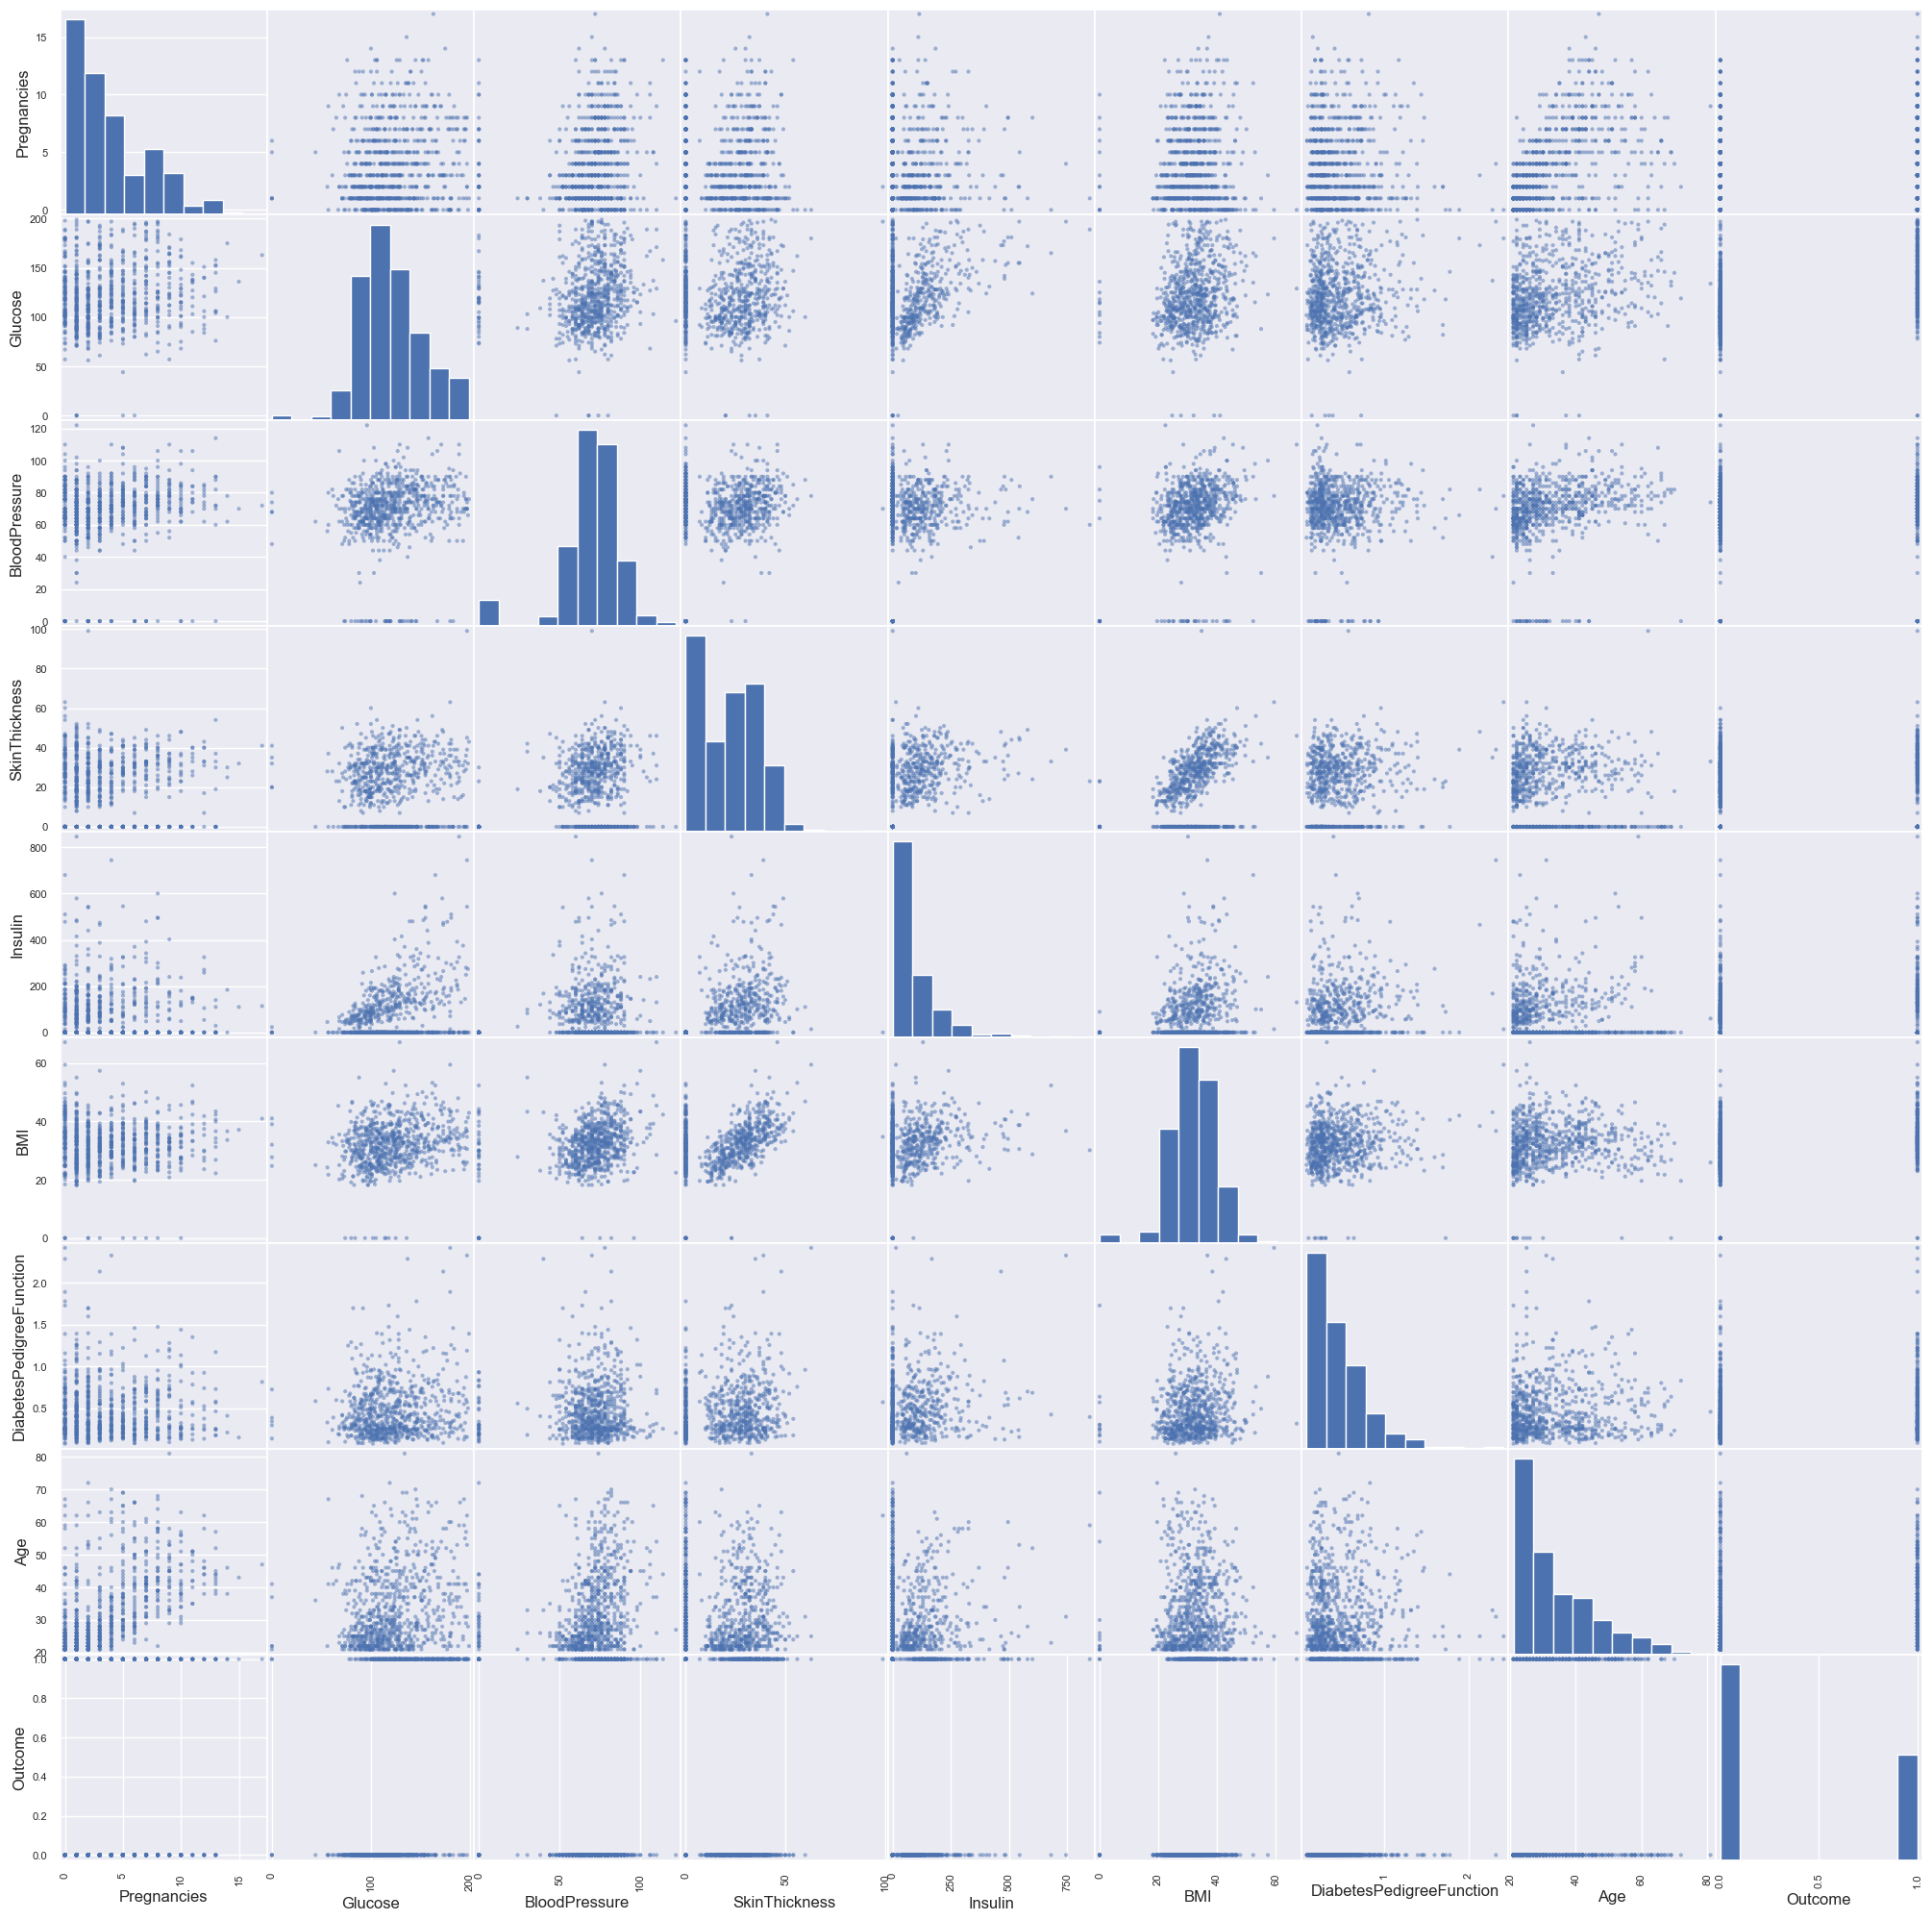

In [20]:
# Vẽ biểu đồ tương quan giữa các cột
p = scatter_matrix(diabetes_df, figsize=(25, 25))



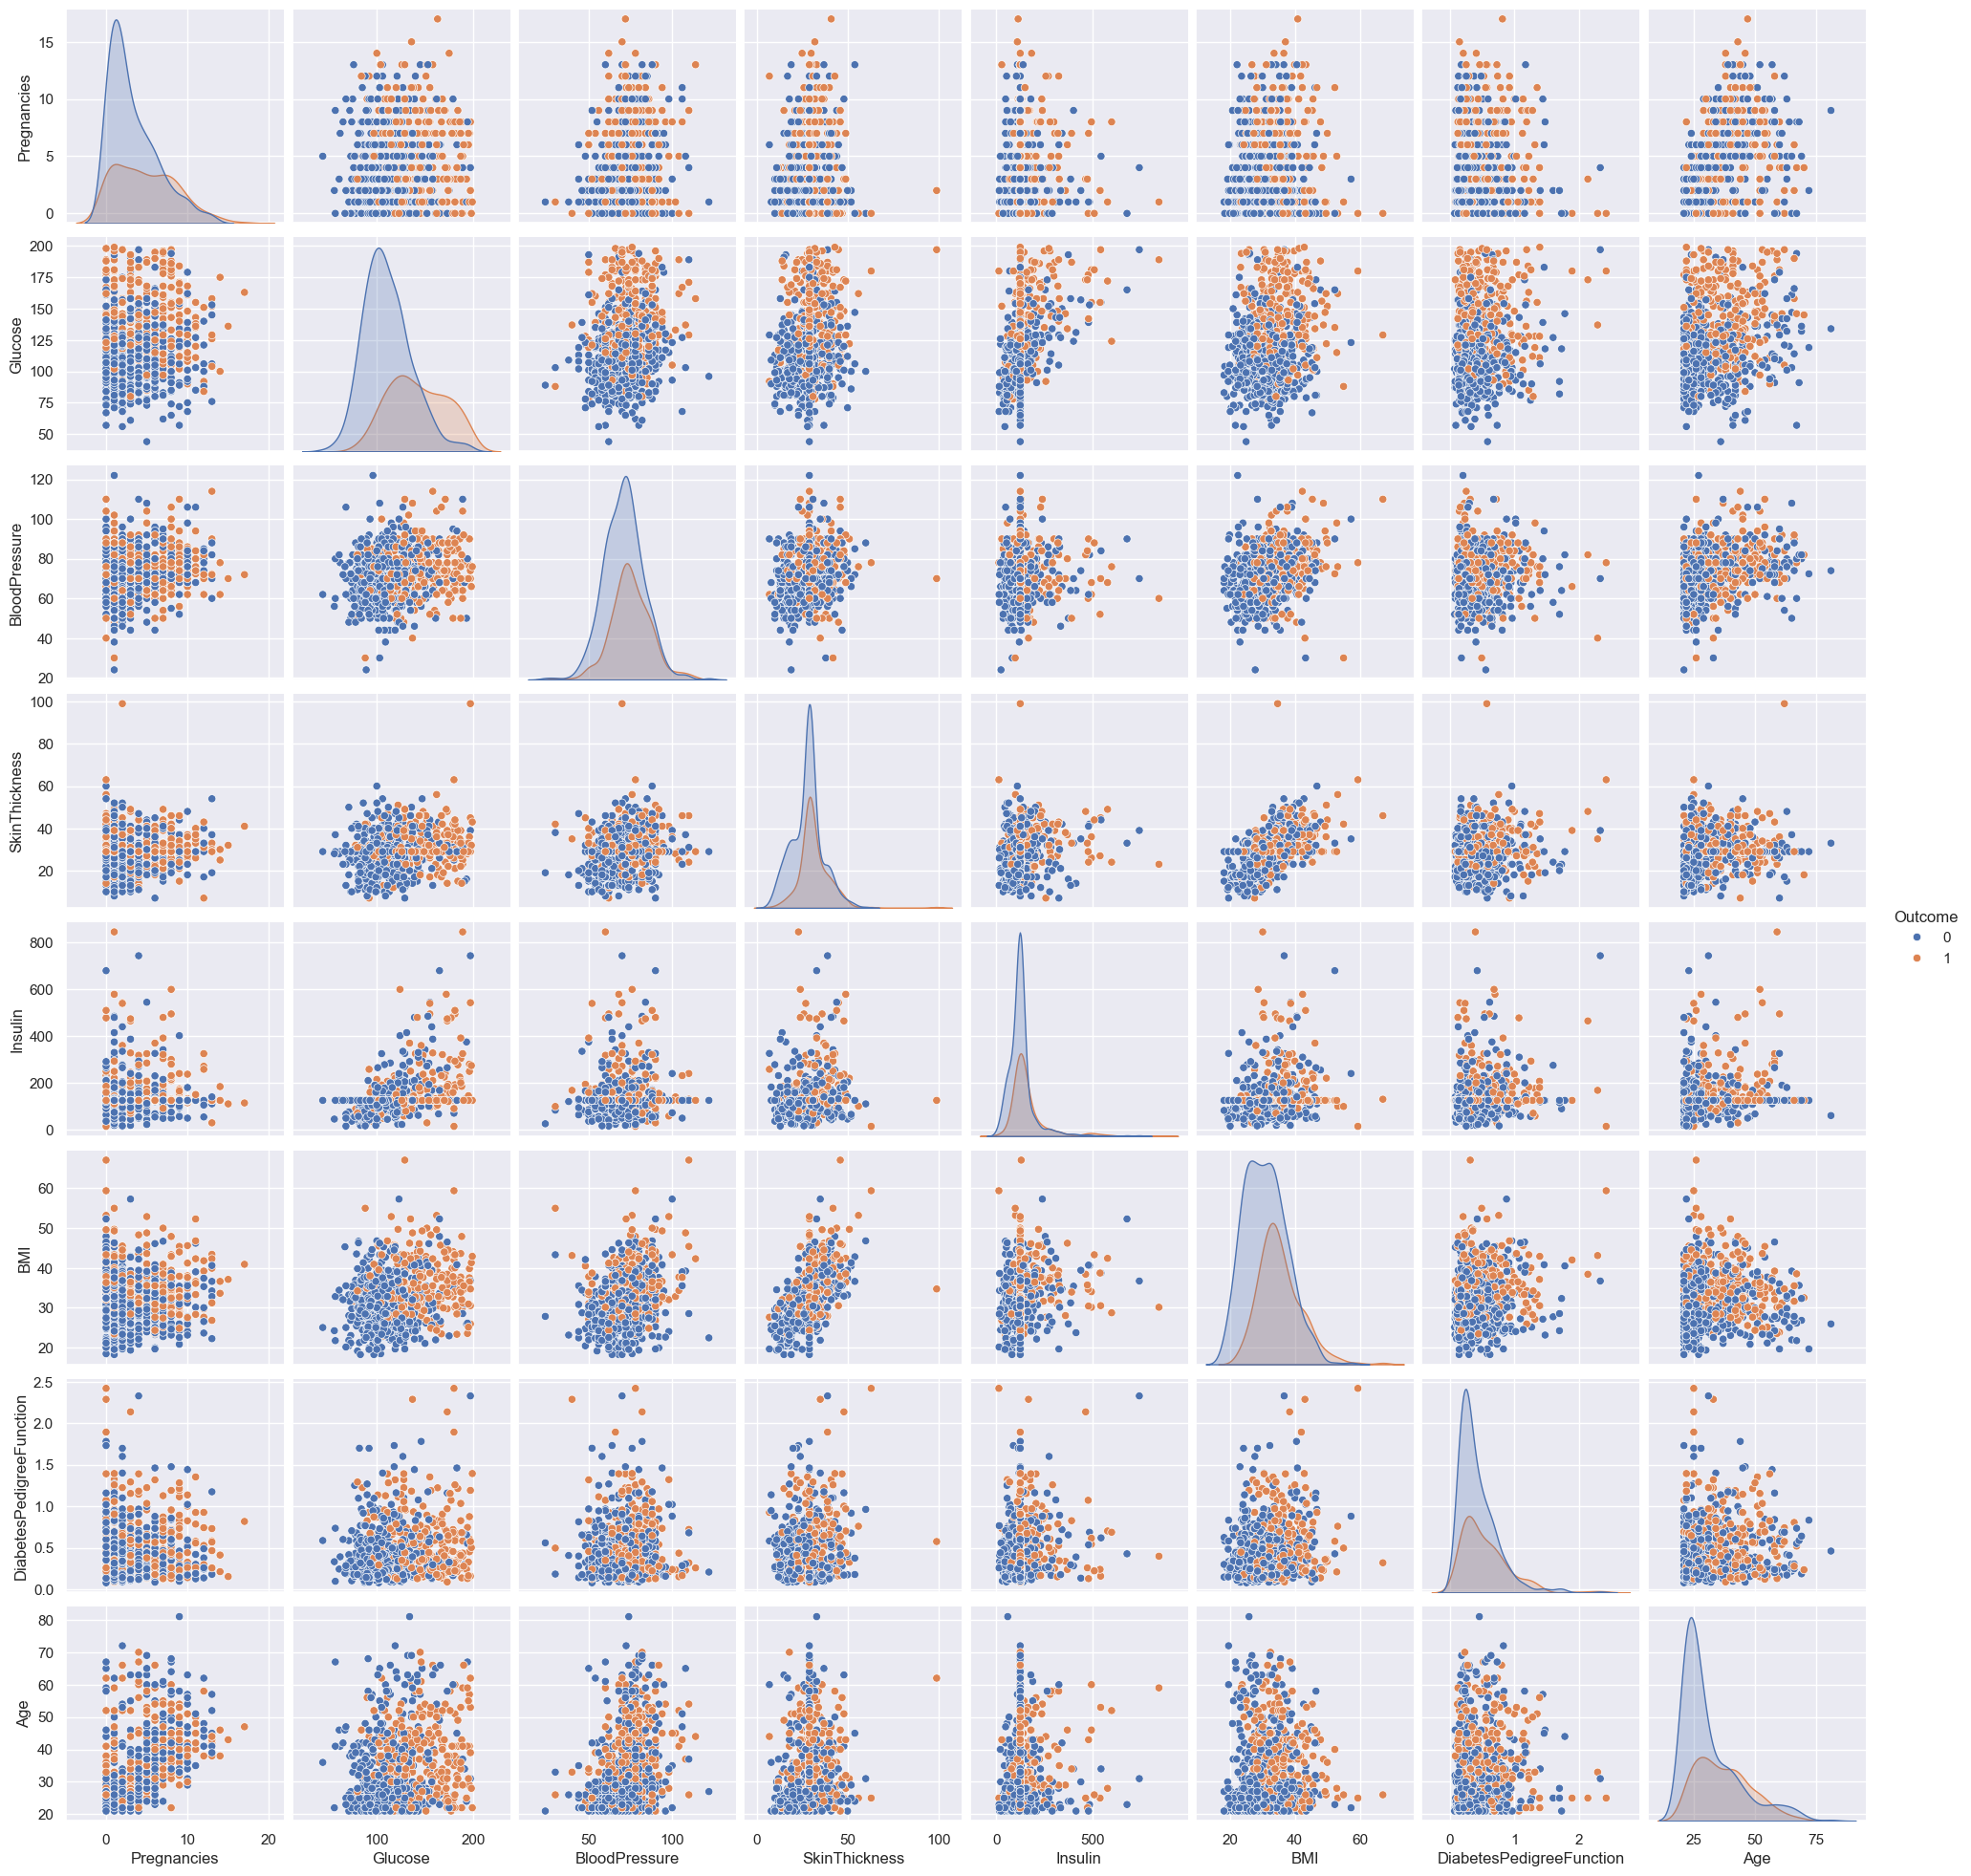

In [21]:
# Vẽ các biểu đồ cặp (Pair Plots) cho dữ liệu.
p = sns.pairplot(diabetes_df_copy, hue='Outcome')

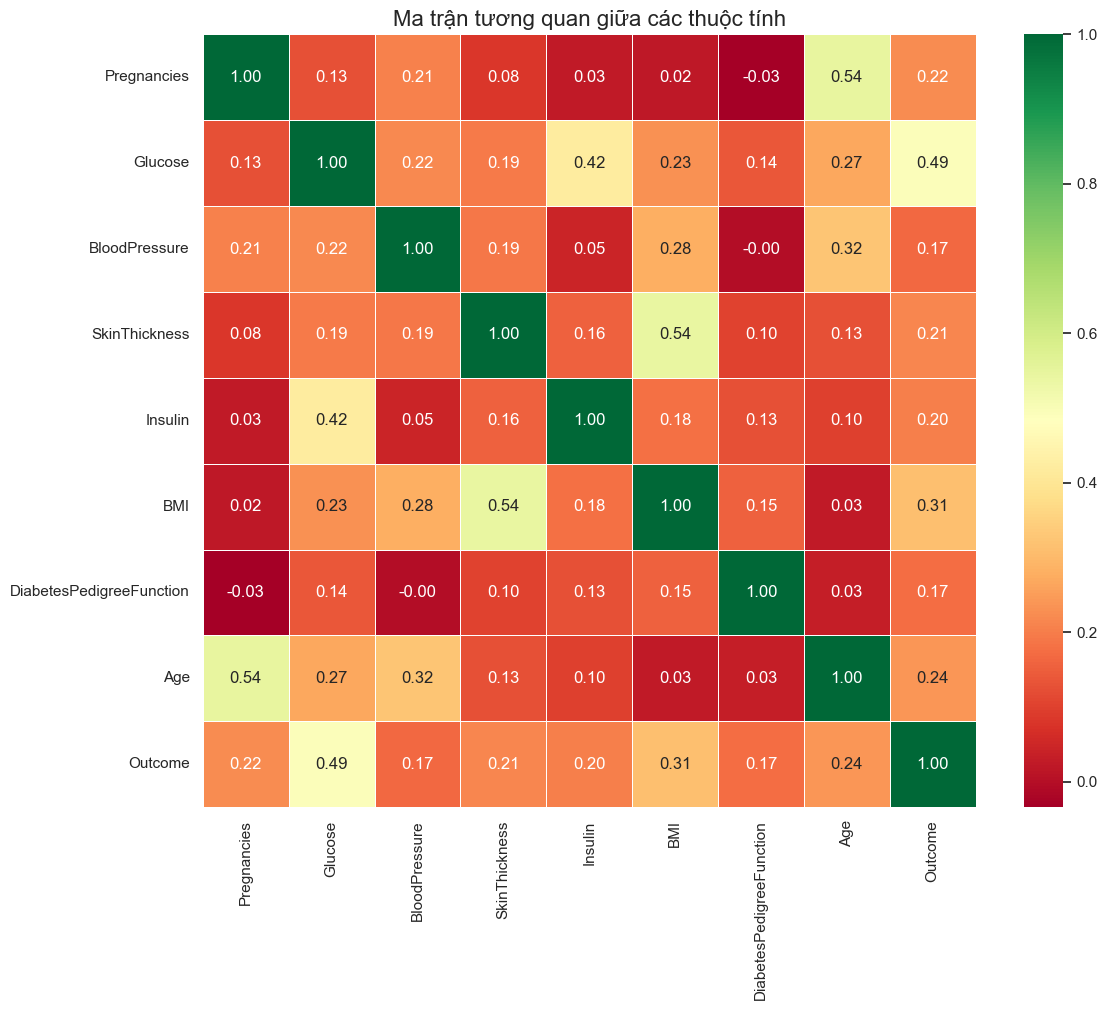

In [68]:

# Tính toán ma trận tương quan
correlation_matrix = diabetes_df_copy.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,         # Hiển thị giá trị trong từng ô
    fmt=".2f",          # Làm tròn giá trị đến 2 chữ số thập phân
    cmap="RdYlGn",      # Dùng bảng màu Red-Yellow-Green
    linewidths=0.5,     # Tăng độ rõ ràng giữa các ô
    square=True         # Làm các ô vuông
)

# Thêm tiêu đề
plt.title("Ma trận tương quan giữa các thuộc tính", fontsize=16)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [23]:
#Hiển thị 5 dòng đầu tiên của DataFrame sau khi làm sạch
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
# Khởi tạo đối tượng StandardScaler để chuẩn hóa dữ liệu
sc_X = StandardScaler()

# Dữ liệu gốc được lấy từ diabetes_df_copy, loại bỏ cột 'Outcome' và chuẩn hóa các thuộc tính còn lại
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [69]:
# Kiểm tra kích thước của các đặc trưng và nhãn
print(f"Số lượng mẫu (rows) trong X: {X.shape[0]}")
print(f"Số lượng đặc trưng (columns) trong X: {X.shape[1]}")
print(f"Số lượng nhãn trong y: {y.shape[0]}")

# Kiểm tra sự tương thích giữa số lượng mẫu và nhãn
if X.shape[0] == y.shape[0]:
    print("Số lượng mẫu và nhãn khớp nhau: Tập dữ liệu hợp lệ.")
else:
    print("Số lượng mẫu và nhãn không khớp: Kiểm tra lại dữ liệu!")


Số lượng mẫu (rows) trong X: 768
Số lượng đặc trưng (columns) trong X: 8
Số lượng nhãn trong y: 768
Số lượng mẫu và nhãn khớp nhau: Tập dữ liệu hợp lệ.


In [ ]:
# Kiểm tra các giá trị đặc trưng và nhãn
print(X.shape)
print(y.shape)

In [26]:
# Chia dữ liệu thành Train và Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# kiểm tra kích thước của tập Train và Test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (512, 8)
X_test shape:  (256, 8)
y_train shape:  (512,)
y_test shape:  (256,)


# Model Building

In [27]:
#K-Nearest Neighbors (KNN)
#Tìm giá trị tốt nhất cho K
test_scores = []
train_scores = []

#Tạo một list chứa giá trị K từ 1 đến 15
for i in range(1,15):
    
        knn = KNeighborsClassifier(i)
        knn.fit(X_train,y_train)
        
        train_scores.append(knn.score(X_train,y_train))
        test_scores.append(knn.score(X_test,y_test))




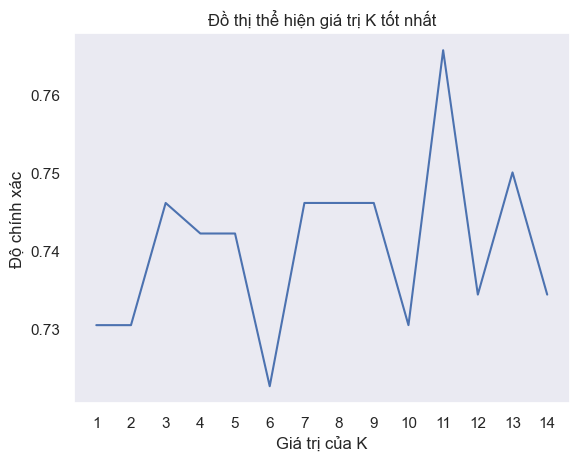

Giá trị K tốt nhất là:  11


In [28]:
# tìm giá trị k tối ưu 
k_range = range(1,15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# Vẽ biểu đồ thể hiện giá trị K tốt nhất
plt.plot(k_range, scores)
plt.xlabel('Giá trị của K')
plt.ylabel('Độ chính xác')
plt.title('Đồ thị thể hiện giá trị K tốt nhất')
plt.xticks(k_range)
plt.grid()
plt.show()

optimal_k = k_range[scores.index(max(scores))]
print("Giá trị K tốt nhất là: ", optimal_k)



In [29]:
#Hiển thị kết quả train_scores
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [30]:
#Hiển thị kết quả test_scores
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

Text(0.5, 1.0, 'Train and Test Scores')

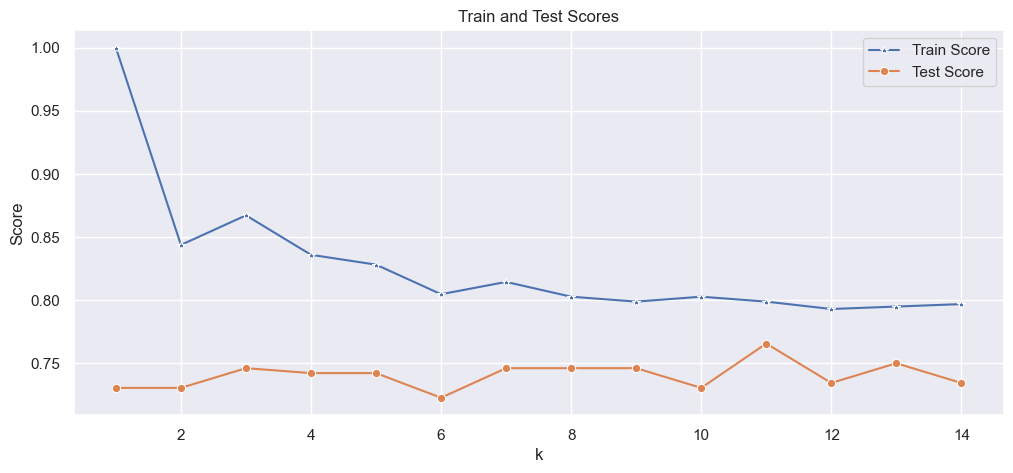

In [31]:

# Vẽ biểu đồ thể hiện kết quả train_scores và test_scores
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Train and Test Scores')


In [32]:
#Hiển thị kết quả test_scores
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

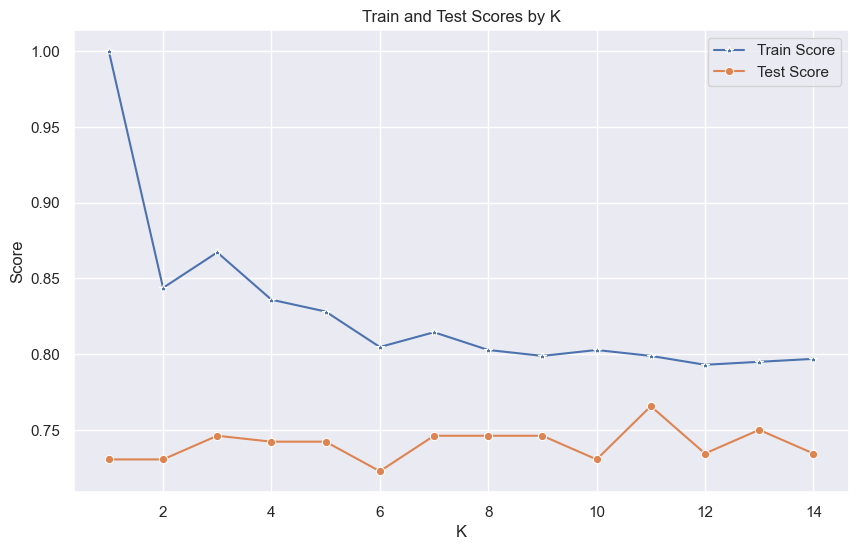

In [33]:


# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

# Thiết lập tiêu đề và nhãn
plt.title('Train and Test Scores by K')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()

# Hiển thị biểu đồ
plt.show()




In [34]:
# Biểu đồ cho thấy kết quả của KNN với k = 11 là tốt nhất
# Sử dụng k = 11 để xây dựng mô hình KNN

# Tạo một đối tượng KNeighborsClassifier với k = 11
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)



0.765625

In [35]:
#xây dựng mô hình KNN với k = 11
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)

#Đánh giá trên tập kiểm tra 
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("F1 Score: ", F1_score)
print("ROC AUC Score: ", roc_auc_score)


Accuracy:  0.765625
F1 Score:  0.6428571428571429
ROC AUC Score:  0.7285204871156564


Ma trận nhầm lẫn mô hình KNN: 
[[142  25]
 [ 35  54]]


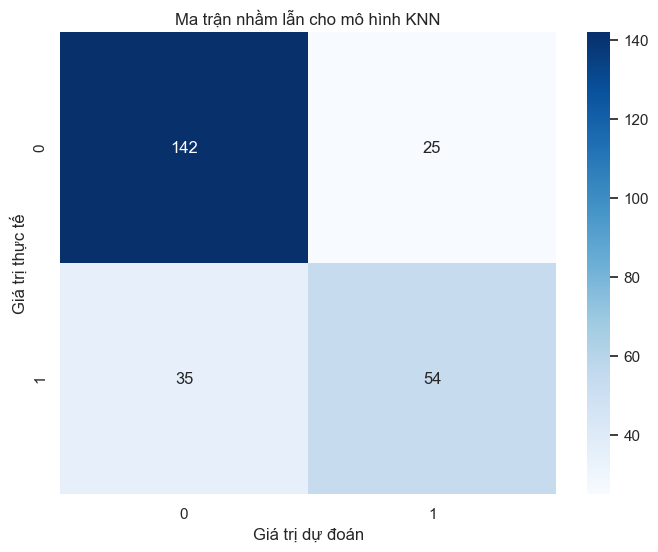

In [36]:
# Ma trận nhầm lẫn 
ma_tran_nham_lan = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn mô hình KNN: ")
print(ma_tran_nham_lan)

# Hiển thị ma trận nhầm lẫn bằng biểu đồ cột
plt.figure(figsize=(8,6))
p = sns.heatmap(ma_tran_nham_lan, annot=True, cmap="Blues", fmt='g')
plt.title('Ma trận nhầm lẫn cho mô hình KNN')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.show()




In [37]:
#In ra báo cáo phân loại Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



# Thuật toán Naive Bayes

In [38]:
#xây dựng mô hình Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Huấn luyện thành công")
# Dự đoán trên tập kiểm tra

y_pred = nb.predict(X_test)

# Đánh giá
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Huấn luyện thành công
Accuracy:  0.72265625


Ma trận nhầm lẫn mô hình Naive Bayes: 
[[131  36]
 [ 35  54]]


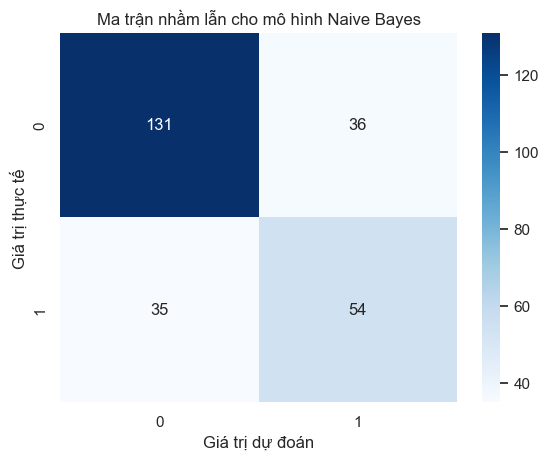

In [40]:

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn mô hình Naive Bayes: ")
print(cm)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g' )
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.title('Ma trận nhầm lẫn cho mô hình Naive Bayes')
plt.show()




In [41]:
#in ra báo cáo phân loại Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       167
           1       0.60      0.61      0.60        89

    accuracy                           0.72       256
   macro avg       0.69      0.70      0.70       256
weighted avg       0.72      0.72      0.72       256



# Mô hình hồi quy logistic

In [42]:
# Xây dựng mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    auc
)
model = LogisticRegression()
model.fit(X_train, y_train)
print("Huấn luyện thành công")

Huấn luyện thành công


In [43]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
# Đánh giá
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.73046875


Ma trận nhầm lẫn mô hình Logistic Regression: 
[[140  27]
 [ 42  47]]


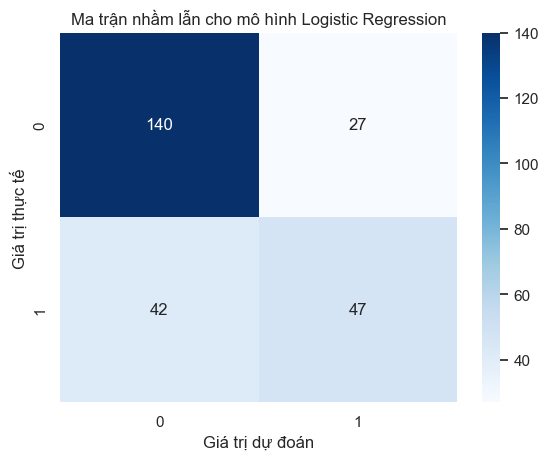

In [44]:

# Đánh giá mô hình
# vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn mô hình Logistic Regression: ")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.title('Ma trận nhầm lẫn cho mô hình Logistic Regression')
plt.show()




In [45]:
# in ra báo cáo phân loại Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.53      0.58        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



# Mô hình cây quyết định

In [52]:
from sklearn.tree import DecisionTreeClassifier
# Sử dụng các siêu tham số để tối ưu mô hình
# Khởi tạo mô hình Cây quyết định
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt_classifier.fit(X_train, y_train)

print("Mô hình Cây quyết định đã được huấn luyện thành công.")


Mô hình Cây quyết định đã được huấn luyện thành công.


In [62]:
# Dự đoán trên tập kiểm tra
y_pred = dt_classifier.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác trên tập kiểm tra: {accuracy:.2f}")

# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))


Độ chính xác trên tập kiểm tra: 0.75

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       167
           1       0.67      0.53      0.59        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.70       256
weighted avg       0.74      0.75      0.74       256



Ma trận nhầm lẫn mô hình Decision Tree: 
[[144  23]
 [ 42  47]]


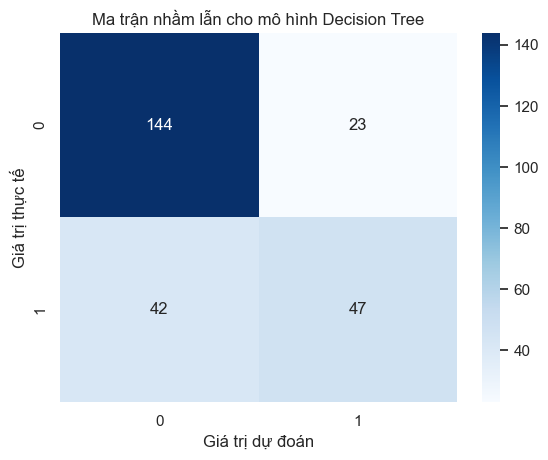

In [70]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g' )
print("Ma trận nhầm lẫn mô hình Decision Tree: ")
print(cm)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.title('Ma trận nhầm lẫn cho mô hình Decision Tree')
plt.show()

Cây quyết định (dạng văn bản):
|--- Glucose <= 0.36
|   |--- Age <= -0.32
|   |   |--- BMI <= 1.88
|   |   |   |--- DiabetesPedigreeFunction <= 0.11
|   |   |   |   |--- Pregnancies <= 1.09
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  1.09
|   |   |   |   |   |--- class: 1
|   |   |   |--- DiabetesPedigreeFunction >  0.11
|   |   |   |   |--- BMI <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  0.04
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  1.88
|   |   |   |--- Insulin <= 1.03
|   |   |   |   |--- class: 1
|   |   |   |--- Insulin >  1.03
|   |   |   |   |--- class: 0
|   |--- Age >  -0.32
|   |   |--- BMI <= -0.81
|   |   |   |--- class: 0
|   |   |--- BMI >  -0.81
|   |   |   |--- Glucose <= -1.26
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  -1.26
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.28
|   |   |   |   |   |--- c

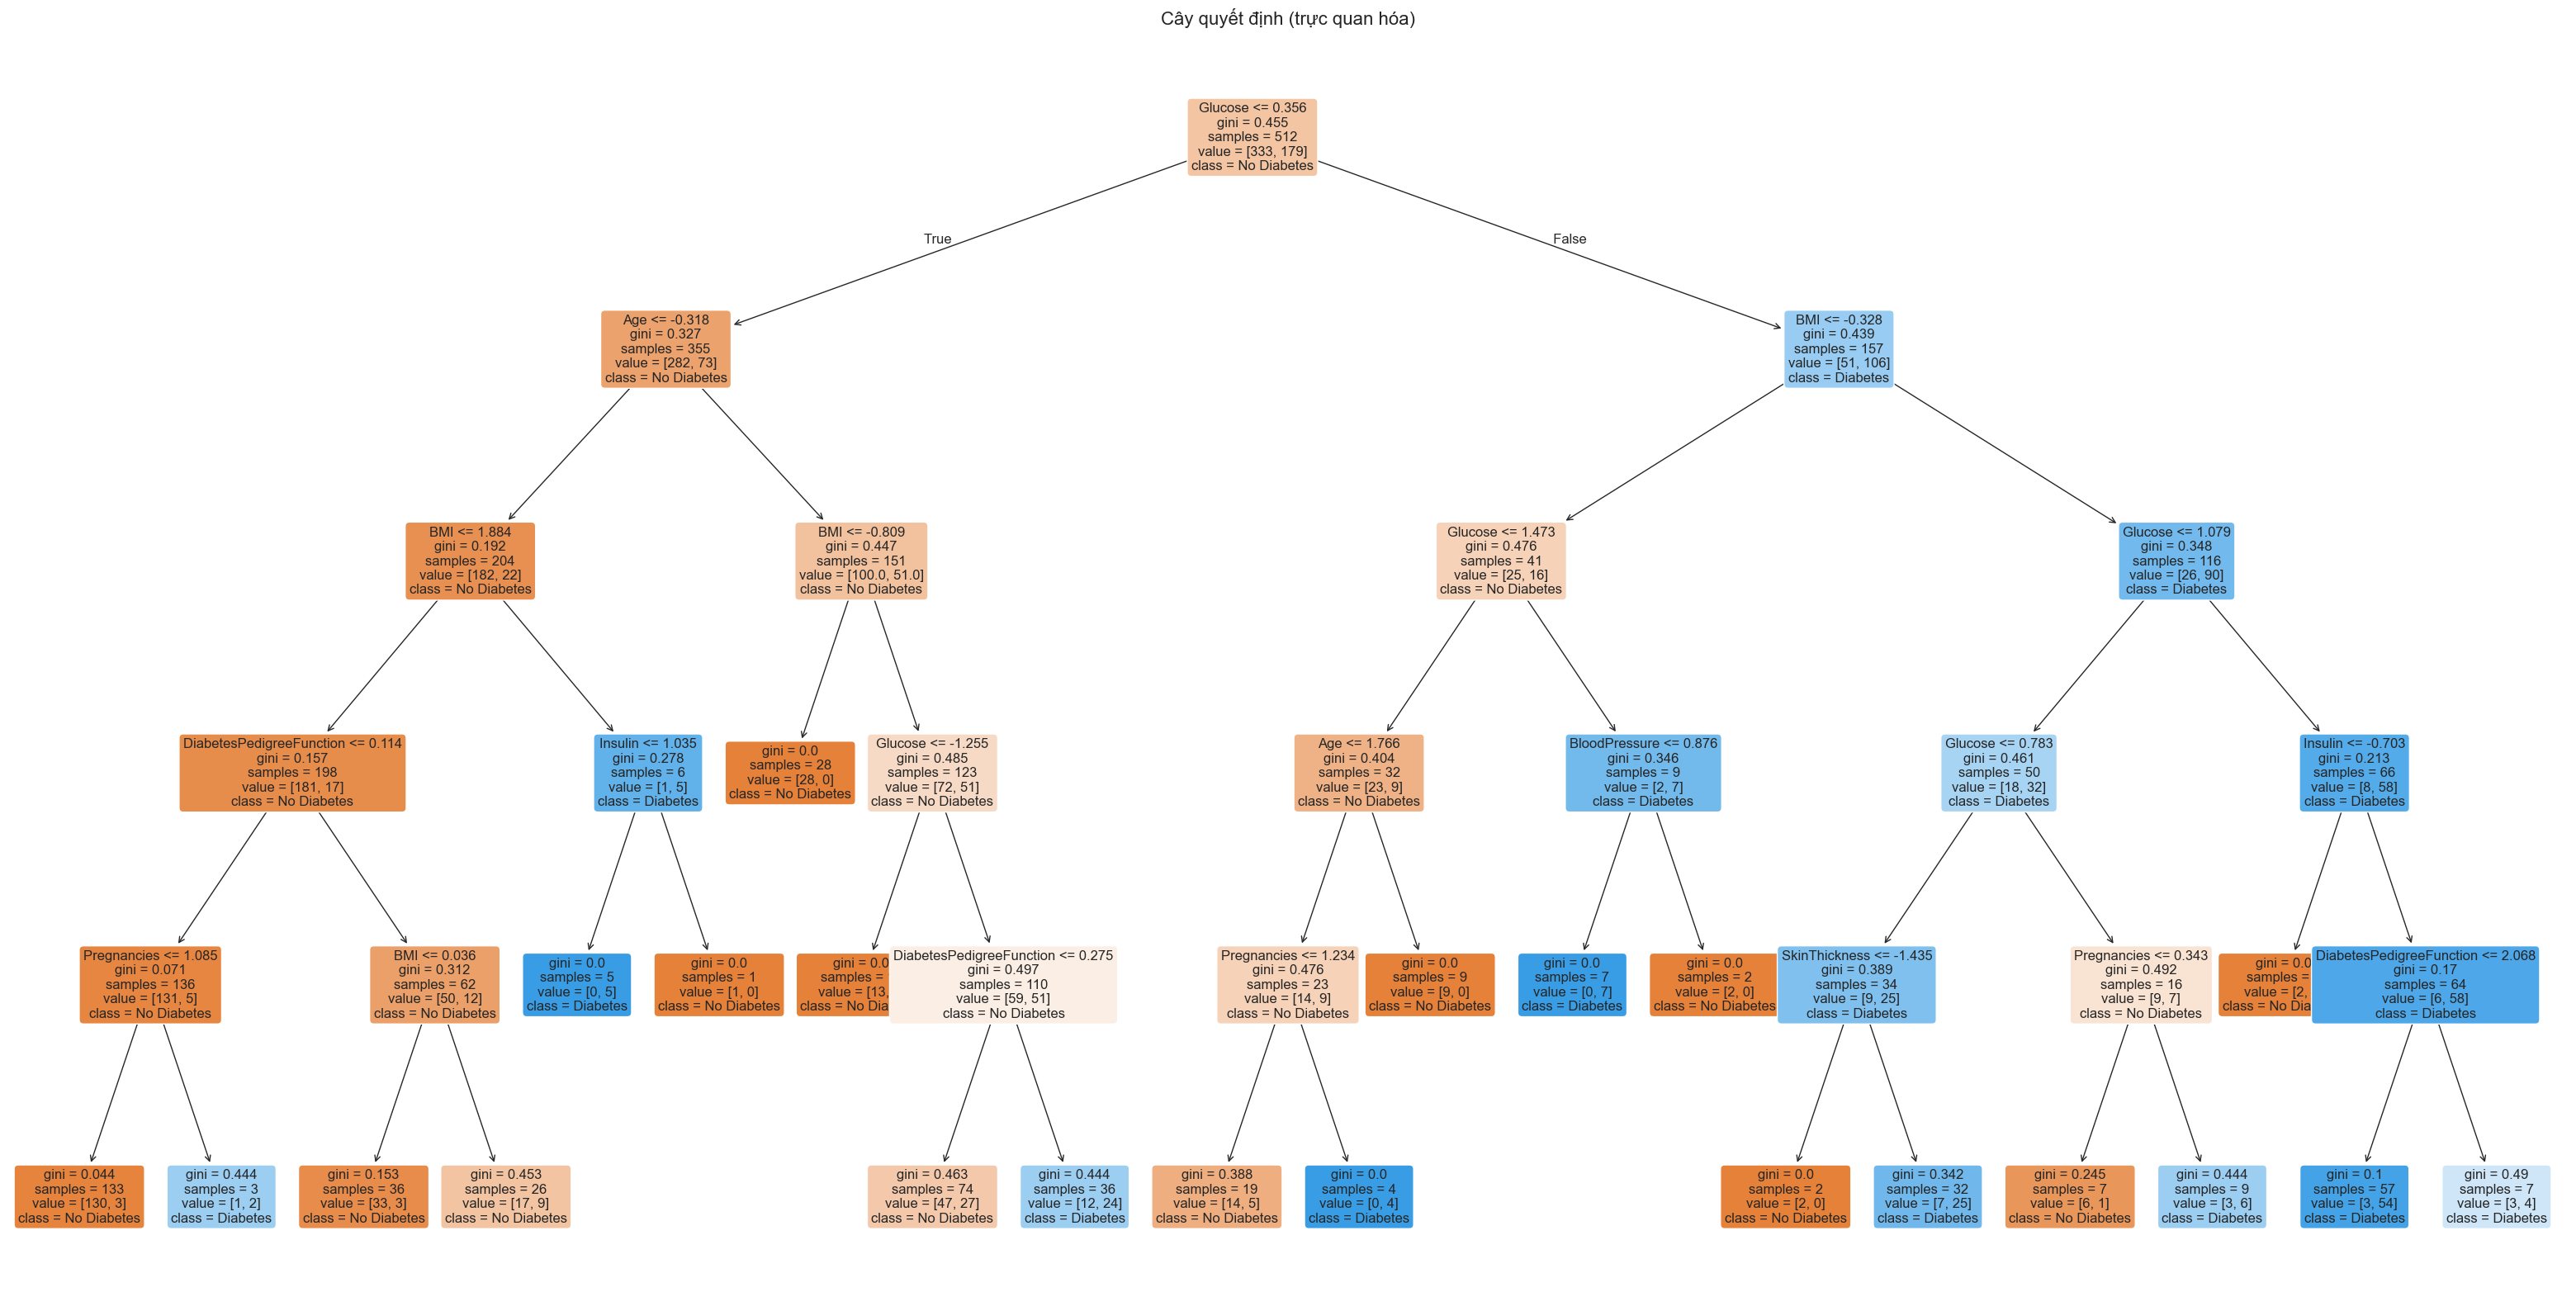

In [59]:
from sklearn.tree import export_text

# Hiển thị cây quyết định bằng biểu diễn văn bản
print("Cây quyết định (dạng văn bản):")
print(export_text(dt_classifier, feature_names=list(X_train.columns)))

# Vẽ cây quyết định với tùy chỉnh
plt.figure(figsize=(40,20))  # Tăng kích thước hình ảnh
plot_tree(
    dt_classifier,
    feature_names=X_train.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,         # Làm các nút tròn hơn
    fontsize=12           # Tăng kích thước chữ
)
plt.title("Cây quyết định (trực quan hóa)", fontsize=16)
plt.show()

